# Traffic Sign Recognition Project

## Problem Statement

To detect traffic road signs from images. We will be detecting among 43 different classes of images.

## Dataset

Dataset can be downloaded from the following link :
    
https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

## Setting up Environment

Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image # python image library, for importing images into the notebook
import os # to change working path
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical # to convert classes to categories (e.g. one-hot encoding)
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


### Creating lists to store data and labels separately in them

In [2]:
# creating rmpty lists to stoore data and labels
data = []
labels = []
classes = 43 # we have 43 classes
current_path = os.getcwd() # getting the current path (not required)

In [3]:
current_path

'E:\\Data Science Projects\\Traffic Sign Detection'

## Preprocessing the images 

In [4]:
# for every class
for i in range(classes):
    path = os.path.join(current_path,'train', str(i))
    print("path:", path)
    images = os.listdir(path)
    for a in images:
        try :
            image = Image.open(path+'\\'+a)
            #resizing image to a standard size i.e. 30x30 pixel
            image = image.resize((30,30))
            image = np.array(image) # converting image to a numpy array
            data.append(image) #adding to the image collection
            labels.append(i) # adding to labels (classes)
        #we can access the attributes of the exception object with the below method
        except Exception as e:
            print(e)
        

path: E:\Data Science Projects\Traffic Sign Detection\train\0
path: E:\Data Science Projects\Traffic Sign Detection\train\1
path: E:\Data Science Projects\Traffic Sign Detection\train\2
path: E:\Data Science Projects\Traffic Sign Detection\train\3
path: E:\Data Science Projects\Traffic Sign Detection\train\4
path: E:\Data Science Projects\Traffic Sign Detection\train\5
path: E:\Data Science Projects\Traffic Sign Detection\train\6
path: E:\Data Science Projects\Traffic Sign Detection\train\7
path: E:\Data Science Projects\Traffic Sign Detection\train\8
path: E:\Data Science Projects\Traffic Sign Detection\train\9
path: E:\Data Science Projects\Traffic Sign Detection\train\10
path: E:\Data Science Projects\Traffic Sign Detection\train\11
path: E:\Data Science Projects\Traffic Sign Detection\train\12
path: E:\Data Science Projects\Traffic Sign Detection\train\13
path: E:\Data Science Projects\Traffic Sign Detection\train\14
path: E:\Data Science Projects\Traffic Sign Detection\train\15
pa

### Converting the list of data and labels into numpy array

In [6]:
data = np.array(data)
labels = np.array(labels)

### Saving Labels and Data for Future Reference

In [7]:
#making new directory
#os.mkdir('training')
np.save('./training/data',data)
np.save('./training/target',labels)

### Loading data and labels

In [8]:
data = np.load('./training/data.npy')
labels = np.load('./training/target.npy')

Looking at shapes

In [9]:
data.shape

(39209, 30, 30, 3)

In [10]:
labels.shape

(39209,)

**Splitting data into train and test set**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 0)

Looking at shapes after splitting the data

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


### Converting all the classes to numerical data using one-hot encoding

In [13]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Building the NN

In [14]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate = 0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))
# we will want the final layers to have 43 nodes corresponding to the 43 classes that we have
model.add(Dense(43, activation = 'softmax'))

**Compiling the model**

Defining loss function, optimizer and performance metrics

In [15]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

**Fititng the model**

By experimentation, we have found that the best validation accuracy is obtained at epochs = 19, after which the loss starts increasing and accuracy starts decreasing.

In [16]:
epochs = 19
training_history = model.fit(X_train, y_train, batch_size = 32, epochs = epochs, validation_data = (X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/19
31367/31367 [==============================] - 12s 367us/step - loss: 1.6957 - accuracy: 0.5871 - val_loss: 0.2529 - val_accuracy: 0.9376
Epoch 2/19
31367/31367 [==============================] - 7s 224us/step - loss: 0.4073 - accuracy: 0.8905 - val_loss: 0.1242 - val_accuracy: 0.9704
Epoch 3/19
31367/31367 [==============================] - 7s 222us/step - loss: 0.2732 - accuracy: 0.9286 - val_loss: 0.1221 - val_accuracy: 0.9670
Epoch 4/19
31367/31367 [==============================] - 8s 256us/step - loss: 0.2346 - accuracy: 0.9401 - val_loss: 0.0691 - val_accuracy: 0.9846
Epoch 5/19
31367/31367 [==============================] - 8s 243us/step - loss: 0.2163 - accuracy: 0.9447 - val_loss: 0.0871 - val_accuracy: 0.9778
Epoch 6/19
31367/31367 [==============================] - 7s 215us/step - loss: 0.2197 - accuracy: 0.9458 - val_loss: 0.0700 - val_accuracy: 0.9821
Epoch 7/19
31367/31367 [==============================] - 7s 2

**Plotting training and validation accuracy**

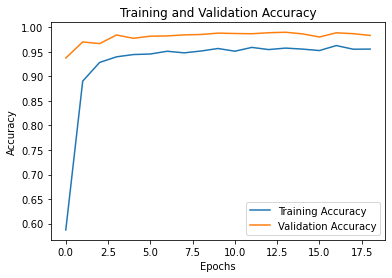

In [17]:
#accuracy 
plt.plot(training_history.history['accuracy'], label = 'Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Plotting Training and Validation Loss**

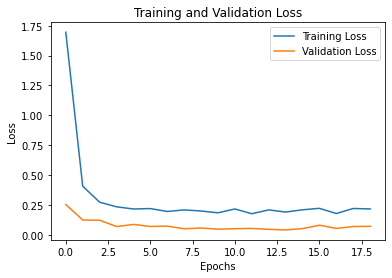

In [18]:
#Loss 
plt.plot(training_history.history['loss'], label = 'Training Loss')
plt.plot(training_history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing on Test Data

In [19]:
# preparing data in right format for training
def testing(testcsv):
    """
    This function will take test scv file with features and labels, 
    break the features and labels and returns them.
    """
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data = []
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30)) #resizing the image
        data.append(np.array(image))
    X_test = np.array(data)
    return X_test, label

In [20]:
#calling the function and storing X_test and labels.
X_test, label = testing('Test.csv')

In [21]:
Y_pred = model.predict_classes(X_test)
Y_pred

array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

## Checking Accuracy with test data

In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label,Y_pred))

0.9510688836104513


## Saving the model for future reference

In [23]:
model.save("./training/TSR.h5")

## Loading the model

In [24]:
#checking current path
os.getcwd() 

'E:\\Data Science Projects\\Traffic Sign Detection'

In [25]:
model = load_model('./training/TSR.h5')

In [26]:
# Giving name to different classes of traffic signs
classes = { 0: 'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons'}

**Creating a function to test on image**

In [27]:
def test_on_img(img):
    data = []
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test = np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image, Y_pred 

Predicted traffic sign is: Stop


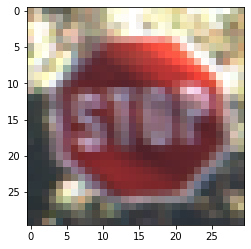

In [28]:
plot,prediction = test_on_img(r'E:\Data Science Projects\Traffic Sign Detection\Test\00963.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted traffic sign is:", classes[a])
plt.imshow(plot)
plt.show()